# Estadística inferencial
**Se llama estadística inferencial o inferencia estadística a la rama de la Estadística encargada de hacer deducciones, es decir, inferir propiedades**, conclusiones y tendencias, a partir de una muestra del conjunto. Su papel es interpretar, hacer proyecciones y comparaciones.

## Muestreo
![alt text](https://upload.wikimedia.org/wikipedia/commons/b/bf/Simple_random_sampling.PNG)

Dado que rara vez tendremos el conjunto de la población para realizar suposiciones, partiremos de una muestra, **una porción de la población, sobre la que trabajaremos con estadísticos para poder llevar a cabo inferencias acerca de los parámetros del conjunto de la población.**

Es muy difícil contar con el total de la población para realizar estudios. Muchas veces por motivos económicos, razones prácticas, o porque simplemente por la naturaleza del problema no es necesario.

Por ejemplo, ya que es imposible tener los datos de todas las personas que han tenido sanidad publica, tomaremos una muestra significativa de los datos y generalizaremos para el resto de la población los parámetros de estudio.

Los conceptos más importantes del muestreo son:

* **Población**: conjunto de individuos de interés

* **Parámetro**: número que describe alguna característica de la población.

* **Muestra**: subconjunto de la población.

* **Estadístico**: número que se calcula a partir de los datos de una muestra

![imagen](./img/poblac_muestra.jpg)


#### Notación del muestreo
![imagen](./img/parameters.png)

Para poder hacere suposiciones acerca del parámetro de una población, tendremos que obtener una muestra. Hay varias maneras de muestrear una población. La más habitual es mediante **muestreo aleatorio**, mediante el cual le asignamos a cada elemento de la población la misma probabilidad de ser seleccionado. Parece sencillo, pero en muchas ocasiones este muestreo está sesgado.

##### ¿Qué es el sesgo?
Se trata de una **distorsión no aleatoria que intrododucimos en la forma en que seleccionamos la muestra**. Si el sesgo muestral no se tiene en cuenta, entonces algunas conclusiones propuestas pueden ser erróneas.

Por ejemplo, si realizamos una encuesta sobre cómo va el país, no será lo mismo si todos los encuestados son de una clase social determinada, o de un partido político concreto.

<img src='https://www.chicagotribune.com/resizer/FPNK7cNR7U4Ag5_LnELoKABx0Tc=/415x233/top/cloudfront-us-east-1.images.arcpublishing.com/tronc/SCDRU4ADLNANVA77N4QPJGMKJM'>

[Enlace a la noticia](https://medium.com/@ODSC/dewey-defeats-truman-how-sampling-bias-can-ruin-your-model-f4f67989709e)



### Distribución muestral
Se trata de la **distribución de un estadístico**. Nos indica cómo varía un estadístico, en función de las diferentes muestras tomadas. Resultado de considerar todas las muestras posibles tomadas de la población. Su estudio permite calcular la probabilidad que se tiene, dada una sola muestra, de acercarse al parámetro de la población. Mediante la distribución muestral se puede estimar el error para un tamaño de muestra dado.

Por ejemplo, vamos a generar una población con una distribución normal de media 10 y desviación estándar 20.

7.923069652118123


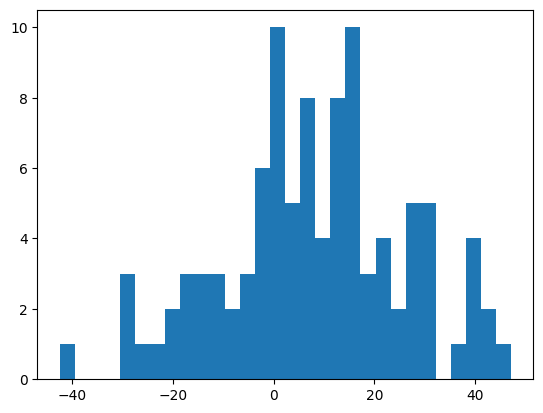

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) # Aunque es aleatorio, el parametro seed hace que todos generemos el mismo escenario aleatorio

data = np.random.normal(loc=10, scale=20, size=100)
# Se parece a una distribución normal, pero debido al numero de muestras no lo representa tal cual.
# Si pongo 10.000 muestras en lugar de 100 en size, mas se parecera a la distribución normal.
plt.hist(data, bins=30)
print(data.mean())

Si tomo una gran cantidad de muestras aleatorias, podré construir una gráfica centrada en el valor original del parámetro, que se corresponderá con la **distribución muestral**.

(array([223., 186., 189., 206., 196.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. ]),
 <BarContainer object of 5 artists>)

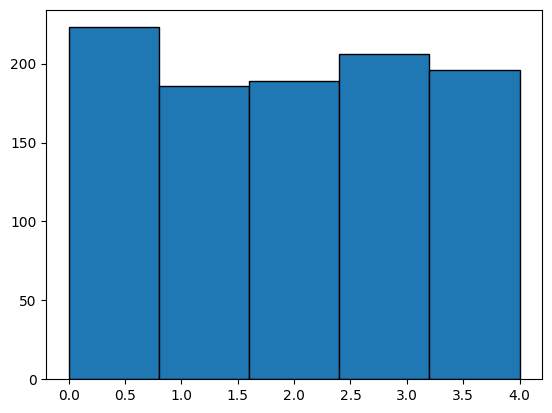

In [9]:
# Valores aleatorios de una distribución uniforme

L = []

for k in range(1000):
    L.append(np.random.randint(5))
    
plt.hist(L, bins=5, edgecolor='black')

# Con edgecolor nos pinta el borde de las barras para ver más claro el histograma

Vamos a realizar el experimento de lanzar 10, 100, 1000 y 10000 veces un dado   
¿Cuál es la probabilidad de obtener un 6? ¿Con qué experimento me aproximo más?

In [18]:
L = []

for k in range (10000):
    L.append(np.random.randint(6)+1)
# le añadimos el + 1 para que refleje el resultado de lanzar un dado (entre 1 y 6)
sum([1 for el in L if el == 6])/len(L)

0.1622

In [20]:
# La probabilidad es 1/6

1/6

0.16666666666666666

¿Cuál es la probabilidad de obtener un 6 al tirar un dado después de haber obtenido un 6?

In [19]:
1/6 * 1/6

0.027777777777777776

In [21]:
L = []

for k in range(100000):
    L.append(np.random.randint(6)+1)

contador = 0
for k in range(len(L)):
    if k<len(L)-1 and L[k]==6 and L[k+1]==6:
        contador += 1
        
contador/len(L)

0.02741

In [23]:
'''
Probabilidad de que dos demandas caigan en el mismo juzgado
si hay 18 juzgados y la asignación es aleatoria
'''
1/18*1/18 # No es correcto

1/18 # La probabilidad de una no depende de la otra, por eso se calcularia asi



0.05555555555555555

## Distribuciones de probabilidad

<img alt="Distribuciones estadísticas" title="Distribuciones estadísticas" src="http://relopezbriega.github.io/images/distribution.png" high=650px width=600px>



Las [variables aleatorias](https://es.wikipedia.org/wiki/Variable_aleatoria) han llegado a desempeñar un papel importante en casi todos los campos de estudio: Estas variables aleatorias son medidas y analizadas en términos
de sus propiedades estadísticas y probabilísticas de las cuales una característica subyacente es su **[función de distribución](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n)**. A pesar de que el número potencial de distribuciones puede ser muy grande, en la práctica, un número relativamente pequeño se utilizan; ya sea porque **tienen características matemáticas que las hace fáciles de usar** o porque se asemejan bastante bien a una porción de la realidad, o por ambas razones combinadas.

#### ¿Por qué es importante conocer las distribuciones?

Muchos resultados en las ciencias se basan en conclusiones que se extraen sobre una población general a partir del estudio de una muestra de esta población. Esta inferencia estadística con frecuencia se basa en hacer suposiciones acerca de la forma en que los datos se distribuyen, o requiere realizar alguna transformación de los datos para que se ajusten mejor a alguna de las  distribuciones conocidas y estudiadas en profundidad.

Las distribuciones de probabilidad teóricas son útiles en la inferencia estadística porque sus propiedades y características son conocidas. Si la distribución real de un conjunto de datos dado es razonablemente cercana a la de una distribución de probabilidad teórica, muchos de los cálculos se pueden realizar en los datos reales utilizando hipótesis extraídas de la distribución teórica.


Una de las mejores maneras de describir una variable es representar los valores que aparecen en el conjunto de datos y el número de veces que aparece cada valor. La representación más común de una distribución es un histograma.